In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/borsa_study

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/borsa_study


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat

%matplotlib inline
sns.set()

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

In [3]:
company_tweet = pd.read_csv('data_sources_tweets/tweets_about_top_companies_2015_2020/Company_Tweet.csv')
tweet = pd.read_csv('data_sources_tweets/tweets_about_top_companies_2015_2020/Tweet.csv')
company = pd.read_csv('data_sources_tweets/tweets_about_top_companies_2015_2020/Company.csv')
company_value = pd.read_csv('data_sources_tweets/values_of_nasdaq_companies_2010_2020/CompanyValues.csv')

In [4]:
def quick_analysis(df):
    print("Data info:")
    print(df.info())
    print("-------------****----------------\n\nData Types:")
    print(df.dtypes)
    print("-------------****----------------\n\nRows and Columns:")
    print(df.shape)
    print("-------------****----------------\n\nColumn names:")
    print(df.columns)
    print("-------------****----------------\n\nNull Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("-------------****----------------\n\nUnique values:")
    print(df.nunique())
    print("-------------****----------------\n\nDescribes:")
    print(df.describe())

In [5]:
def get_eda_features(df):
    #Visual Exploratory Data Analysis (EDA) And Your First Model
    #EDA on Feature Variables
    print(list(set(df.dtypes.tolist())))
    df_object = df.select_dtypes(include=["object"]).copy()
    df_int = df.select_dtypes(include=['int64']).copy()

    categorical = df_object.columns
    numerical = df_int.columns

    print("Datashape of Object Dataframe:",df_object.shape)
    print("Datashape of Interger Dataframe:",df_int.shape)
    return categorical, numerical

In [6]:
def univariate_analysis(df, categorical, row_num=1, col_num=2):
    fig,ax = plt.subplots(row_num,col_num, figsize=(20, 5*row_num))
    for variable,subplot in zip(categorical,ax.flatten()):
        sns.countplot(df[variable],ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(20)

In [7]:
def univariate_analysis_on_numerial(df, numerical, row_num=1,col_num=2):
    df[numerical].hist(bins=50,figsize=(16 + (2*row_num),20),layout=(8, col_num))

In [8]:
def column_distplot(df, column_name, bins=50, describe=True):
    if describe:
        print(df[column_name].describe())
    plt.figure(figsize=(9, 8))
    sns.distplot(df[column_name], color='g', bins=bins, hist_kws={'alpha': 0.4});

In [9]:
quick_analysis(company)
company

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker_symbol  6 non-null      object
 1   company_name   6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes
None
-------------****----------------

Data Types:
ticker_symbol    object
company_name     object
dtype: object
-------------****----------------

Rows and Columns:
(6, 2)
-------------****----------------

Column names:
Index(['ticker_symbol', 'company_name'], dtype='object')
-------------****----------------

Null Values:
ticker_symbol    0.0
company_name     0.0
dtype: float64
-------------****----------------

Unique values:
ticker_symbol    6
company_name     5
dtype: int64
-------------****----------------

Describes:
       ticker_symbol company_name
count              6            6
unique             6            5
top             AAPL   Google Inc
freq

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [10]:
company_categorial, company_numerical = get_eda_features(company)

[dtype('O')]
Datashape of Object Dataframe: (6, 2)
Datashape of Interger Dataframe: (6, 0)


In [11]:
company_categorial, company_numerical

(Index(['ticker_symbol', 'company_name'], dtype='object'),
 Index([], dtype='object'))

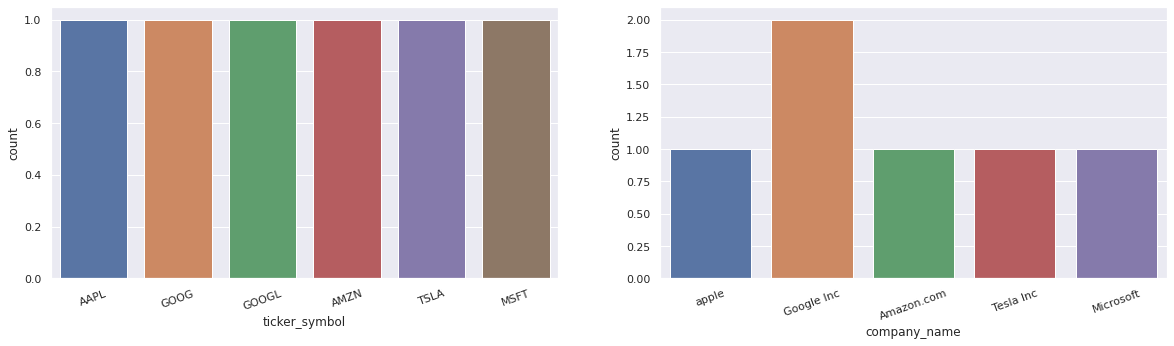

In [12]:
univariate_analysis(company, company_categorial, row_num=1, col_num=2)

In [13]:
quick_analysis(company_tweet)
company_tweet

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB
None
-------------****----------------

Data Types:
tweet_id          int64
ticker_symbol    object
dtype: object
-------------****----------------

Rows and Columns:
(4336445, 2)
-------------****----------------

Column names:
Index(['tweet_id', 'ticker_symbol'], dtype='object')
-------------****----------------

Null Values:
tweet_id         0.0
ticker_symbol    0.0
dtype: float64
-------------****----------------

Unique values:
tweet_id         3717964
ticker_symbol          6
dtype: int64
-------------****----------------

Describes:
           tweet_id
count  4.336445e+06
mean   8.834282e+17
std    1.927735e+17
min    5.504415e+17
25%    7.185450e+17
50%    8.825934e+17
75%    1.054776e+18
max    1.212

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


In [14]:
quick_analysis(company_value)
company_value.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB
None
-------------****----------------

Data Types:
ticker_symbol     object
day_date          object
close_value      float64
volume             int64
open_value       float64
high_value       float64
low_value        float64
dtype: object
-------------****----------------

Rows and Columns:
(17528, 7)
-------------****----------------

Column names:
Index(['ticker_symbol', 'day_date', 'close_value', 'volume', 'open_

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [15]:
company_value_categorial, company_value_numerical = get_eda_features(company_value)

[dtype('O'), dtype('int64'), dtype('float64')]
Datashape of Object Dataframe: (17528, 2)
Datashape of Interger Dataframe: (17528, 1)


In [16]:
company_value_categorial

Index(['ticker_symbol', 'day_date'], dtype='object')

In [17]:
company_value_categorial = company_value_categorial.drop("day_date")

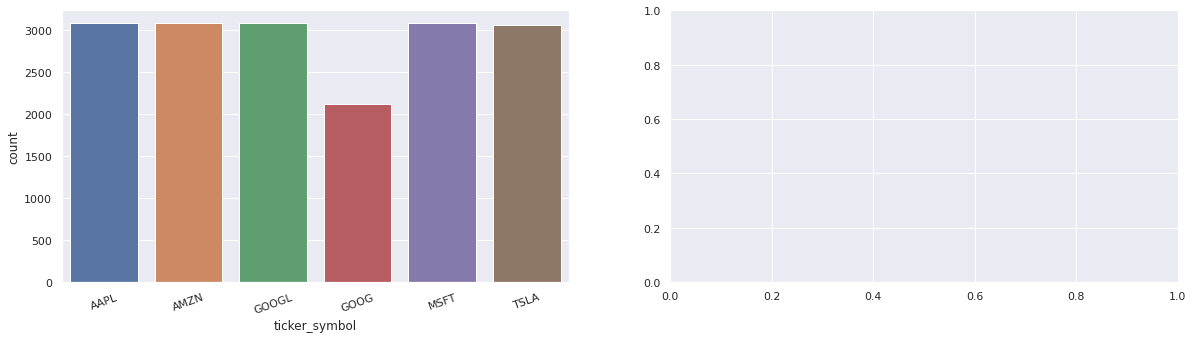

In [18]:
univariate_analysis(company_value, company_value_categorial, row_num=1, col_num=2)

In [19]:
company_value_numerical

Index(['volume'], dtype='object')

count    1.752800e+04
mean     2.025441e+07
std      3.322733e+07
min      7.932000e+03
25%      2.075086e+06
50%      4.835618e+06
75%      2.704358e+07
max      4.624423e+08
Name: volume, dtype: float64


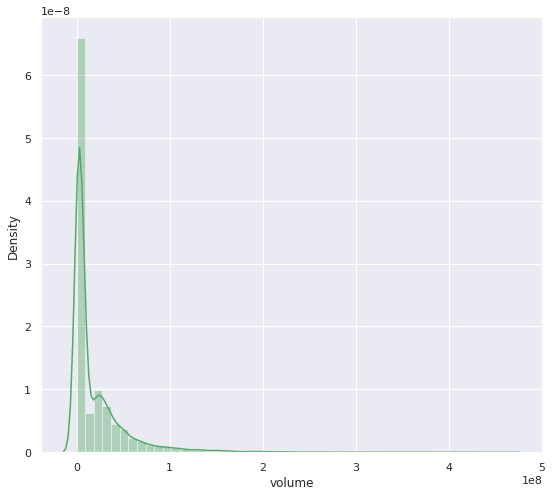

In [20]:
column_distplot(company_value, "volume")

In [21]:
quick_analysis(tweet)
tweet.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB
None
-------------****----------------

Data Types:
tweet_id        int64
writer         object
post_date       int64
body           object
comment_num     int64
retweet_num     int64
like_num        int64
dtype: object
-------------****----------------

Rows and Columns:
(3717964, 7)
-------------****----------------

Column names:
Index(['tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num',
       'like_num'],
      dtype='object')
-------------****----------------

Null Values:
tweet_id       0.000000
writer         0.012715
post_date      0.000000
body           0.000000

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [22]:
tweet_categorial, tweet_numerical = get_eda_features(tweet)

[dtype('O'), dtype('int64')]
Datashape of Object Dataframe: (3717964, 2)
Datashape of Interger Dataframe: (3717964, 5)


In [23]:
tweet_categorial

Index(['writer', 'body'], dtype='object')

In [24]:
tweet['writer'].describe()

count     3670691
unique     140131
top       App_sw_
freq        91741
Name: writer, dtype: object

In [25]:
tweet['body'].str.split().str.len()

0          17
1          20
2          21
3          13
4          16
           ..
3717959    53
3717960    40
3717961    10
3717962     9
3717963    17
Name: body, Length: 3717964, dtype: int64

In [26]:
body_len = tweet['body'].str.split().str.len()
body_len.describe()

count    3.717964e+06
mean     1.758108e+01
std      9.618676e+00
min      1.000000e+00
25%      1.200000e+01
50%      1.500000e+01
75%      2.100000e+01
max      6.800000e+01
Name: body, dtype: float64

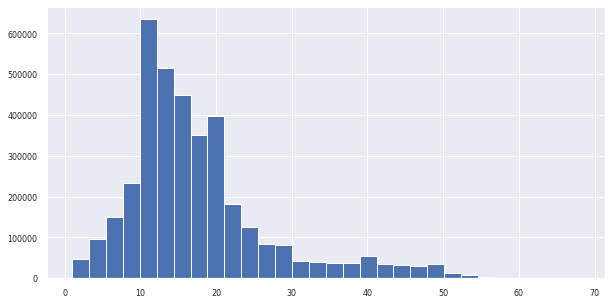

In [27]:
body_len.hist(figsize=(10, 5), bins=30, xlabelsize=8, ylabelsize=8)

In [28]:
tweet_numerical

Index(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], dtype='object')

In [29]:
tweet_numerical = tweet_numerical.drop(['tweet_id'])

tweet_numerical

Index(['post_date', 'comment_num', 'retweet_num', 'like_num'], dtype='object')

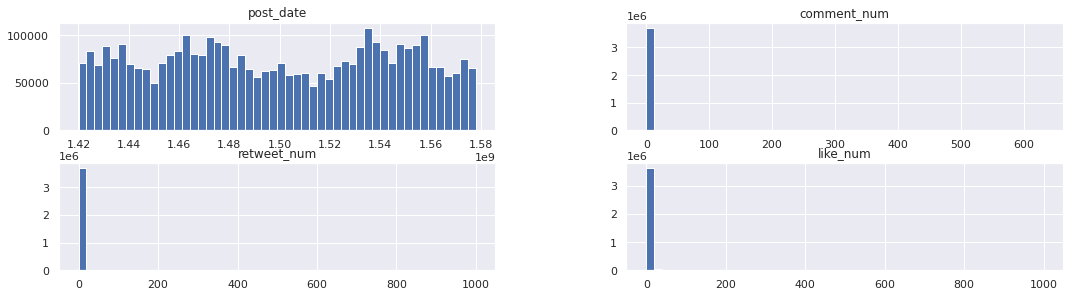

In [30]:
univariate_analysis_on_numerial(tweet, tweet_numerical)

In [31]:
tweet_df = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")
tweet_df.head(5)

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [32]:
company_value.head(5)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [33]:
tweet_df["total_engangement"] = tweet_df["comment_num"] + tweet_df["retweet_num"] + tweet_df["like_num"]

count    4.336445e+06
mean     3.030775e+00
std      1.901432e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.703000e+03
Name: total_engangement, dtype: float64


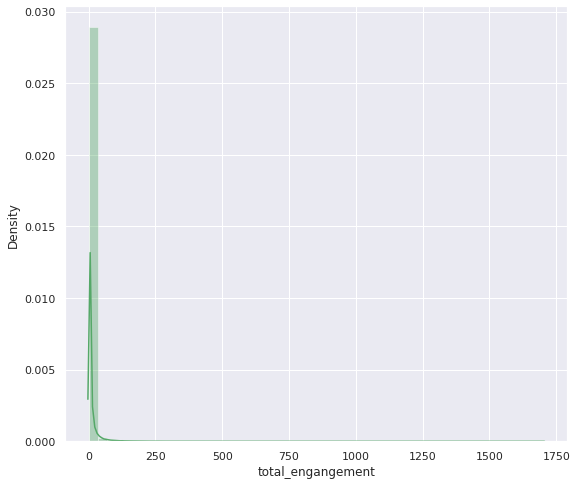

In [34]:
column_distplot(tweet_df, column_name="total_engangement")

In [35]:
engagement_threshold = 40

In [36]:
tweet_df = tweet_df[tweet_df["total_engangement"] > engagement_threshold]

In [37]:
tweet_df['post_date'] = pd.to_datetime(tweet_df['post_date'], unit='s')

In [38]:
tweet_df['day_date'] = pd.to_datetime(tweet_df['post_date'].apply(lambda date: date.date()))

In [39]:
tweet_df = tweet_df.sort_values(by="day_date")

In [40]:
stock_df = company_value
stock_df['day_date']  = pd.to_datetime(stock_df['day_date'])
stock_df.sample(5)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
9356,GOOG,2020-01-03,1360.66,1187006,1347.860,1372.500,1345.5436
8715,GOOGL,2015-03-29,557.55,1725780,561.830,564.066,556.9300
12576,MSFT,2015-08-25,40.47,70369920,42.565,43.240,40.3900
4905,AMZN,2013-03-07,273.88,1938987,274.100,274.800,271.8500
7408,GOOGL,2015-06-29,541.25,1880383,546.750,550.900,540.2400


In [41]:
start_day = min(tweet_df['day_date'])
print(f"Start day: {start_day}")

end_day = max(tweet_df['day_date'])
print(f"End day: {end_day}")

Start day: 2015-01-01 00:00:00
End day: 2019-12-31 00:00:00


In [42]:
stock_df = stock_df[(stock_df['day_date'] >= start_day) & (stock_df['day_date'] <= end_day)]

In [43]:
stock_df = stock_df.sort_values(by="day_date")

In [44]:
tweet_df = tweet_df.drop(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], axis=1)

In [45]:
print(tweet_df.info())
print()
tweet_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54440 entries, 40 to 4336399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ticker_symbol      54440 non-null  object        
 1   writer             53902 non-null  object        
 2   body               54440 non-null  object        
 3   total_engangement  54440 non-null  int64         
 4   day_date           54440 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.5+ MB
None



,ticker_symbol,writer,body,total_engangement,day_date
4144275,TSLA,vincent13031925,$UBER has $72B Market Cap vs $TSLA only $42B ?...,593,2019-05-10
4223268,TSLA,Polixenes13,"Put my ear to the ground, and heard $TSLA's IR...",53,2019-08-06
1890432,GOOG,WSJ,Europe’s antitrust regulator will file formal ...,88,2015-04-14
883382,AAPL,TheStreet,"Britain may move out of the European Union, bu...",50,2016-11-17
2922511,AMZN,option_snipper,$amzn still huge upside room. not impossible t...,53,2018-04-28


In [46]:
print(stock_df.info())
print()
stock_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10956 entries, 2517 to 103
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  10956 non-null  object        
 1   day_date       10956 non-null  datetime64[ns]
 2   close_value    10956 non-null  float64       
 3   volume         10956 non-null  int64         
 4   open_value     10956 non-null  float64       
 5   high_value     10956 non-null  float64       
 6   low_value      10956 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 684.8+ KB
None



,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
14853,TSLA,2018-11-07,348.16,7366706,343.34,351.18,340.8000
10328,GOOG,2016-02-24,699.56,1961258,688.92,700.00,680.7800
3749,AMZN,2017-10-06,989.58,3747408,975.64,995.75,975.6400
11225,GOOG,2018-09-01,1218.19,1812366,1234.98,1238.66,1211.2854
7320,GOOGL,2015-11-02,747.74,1994264,737.88,748.18,731.4500


In [47]:
import nltk                             
# from nltk.corpus import twitter_samples                            
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer  

import random  
import re                     
import string

# nltk.download('stopwords')

In [48]:
tweets = tweet_df["body"]
tweets

40         This is Wall Street's top pick in 2015. Hint: ...
47         See how tech companies like Apple, Twitter and...
242        Top Stock Analyst Releases Report on Top Stock...
243        Analyst Report on Top Stock Market Options for...
244        Analyst Report on Top Stock Market Options for...
                                 ...                        
4335656    Not some conspiracy theory, btw. @PlainSite pu...
4335644    Tesla China-Made Model 3 has reached over 1,50...
4335624    Repeat after me: $TSLA is the only company in ...
4335587    ‘Save Clips on Honk’ function records a flying...
4336399    $TSLA Interesting...$93M trade after hours!Whe...
Name: body, Length: 54440, dtype: object

In [49]:
def remove_special_character(tweet):
    # print(tweet)
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    
    return tweet

In [50]:
tweet_df["tweet"] = tweet_df["body"].apply(lambda tweet: remove_special_character(tweet))

In [51]:
tweet_df["tweet"] = tweet_df["tweet"].str.lower()

In [52]:
tweet_df[["body", "tweet"]].sample(10)

,body,tweet
4184117,"#Tesla Model X P100D → 2 years, 8 months → 0 p...","tesla model x pd → years, months → problems..."
2506757,Google is giving consumers more control over d...,google is giving consumers more control over d...
2906004,Amazon becomes the second most valuable public...,amazon becomes the second most valuable public...
3888772,I’m no trader but a chart pattern on $TSLA ca...,i’m no trader but a chart pattern on $tsla ca...
3890568,This was an overt and knowing lie meant to dec...,this was an overt and knowing lie meant to dec...
1783201,To ATH by % order $SPX 0.6%$HD 0.7%$WMT 0.8%$J...,to ath by % order $spx .%$hd .%$wmt .%$jpm .%$...
4085660,About 150 vertical pillars have gone up and so...,about vertical pillars have gone up and some ...
3794984,I can't wait for Antifa's question on the conf...,i can't wait for antifa's question on the conf...
1700755,FAANGs off the HighsBaidu $BIDU -62%Tesla $TSL...,faangs off the highsbaidu $bidu -%tesla $tsla ...
4193082,"In Germany, 3,100€ discounts on $TSLA models (...","in germany, ,€ discounts on $tsla models (on t..."


In [53]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=0d3ef3dd74cfdedbd93061012565ce764c90e1147e98e44a78ec3a441f023afb
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [54]:
from afinn import Afinn
afinn = Afinn()

In [55]:
tweet_df['afinn_score'] = tweet_df['tweet'].apply(lambda tweet: afinn.score(tweet))
tweet_df['afinn_score'].sample(5)

999091     0.0
3993702   -4.0
4113731    4.0
3324545    4.0
4079913   -1.0
Name: afinn_score, dtype: float64

In [56]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.3 MB/s 


In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [58]:
def getVanderScore(tweet):    
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

def getVanderSentiment(score):    
    if (score >= 0.05): 
        return "Positive"
    
    elif (score < 0.05 and score > -0.05):
        return "Neutral"
    
    elif (score <= -0.05):    
        return "Negative"
    
    return score

In [59]:
tweet_df['vander_score'] = tweet_df['body'].apply(lambda tweet: getVanderScore(tweet))
tweet_df['vander_sentiment'] = tweet_df['vander_score'].apply(lambda score: getVanderSentiment(score))
tweet_df[['ticker_symbol', 'day_date', 'vander_score', 'vander_sentiment']].sample(10)

,ticker_symbol,day_date,vander_score,vander_sentiment
4016648,TSLA,2019-01-23,-0.5859,Negative
3732171,TSLA,2018-05-03,-0.8439,Negative
3088490,AMZN,2019-10-26,0.5574,Positive
4039197,TSLA,2019-02-17,0.1450,Positive
3947830,TSLA,2018-10-25,0.2732,Positive
2866650,AMZN,2017-11-06,0.0000,Neutral
1390709,AAPL,2018-07-30,0.0000,Neutral
1902614,GOOG,2015-05-18,-0.0258,Neutral
3932281,TSLA,2018-10-12,0.8910,Positive
2915396,AMZN,2018-04-11,0.5859,Positive


Sentiment score of apple company


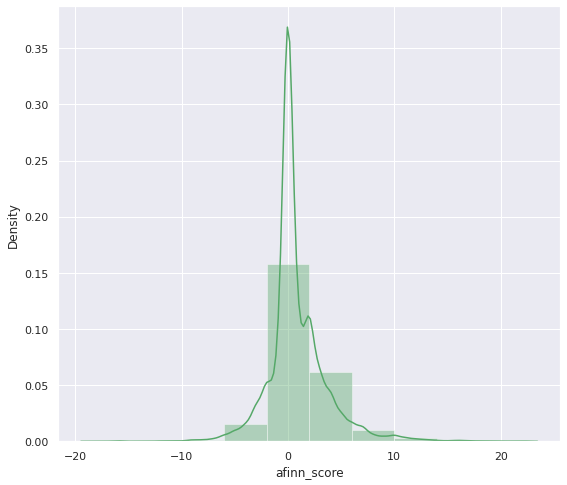

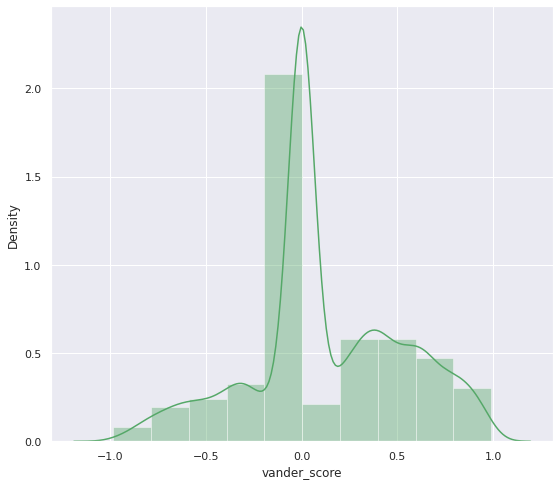



--------------


Sentiment score of Amazon.com company


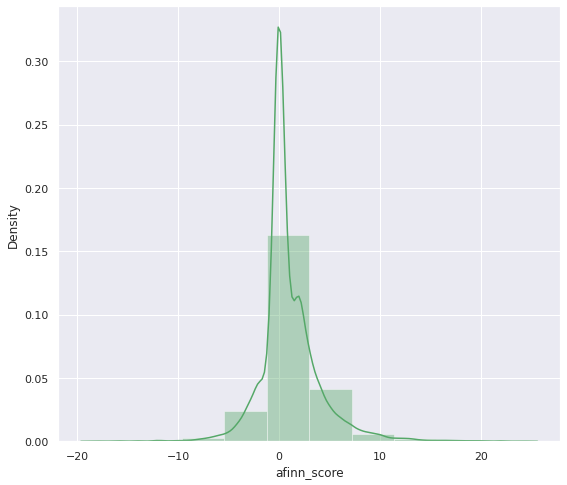

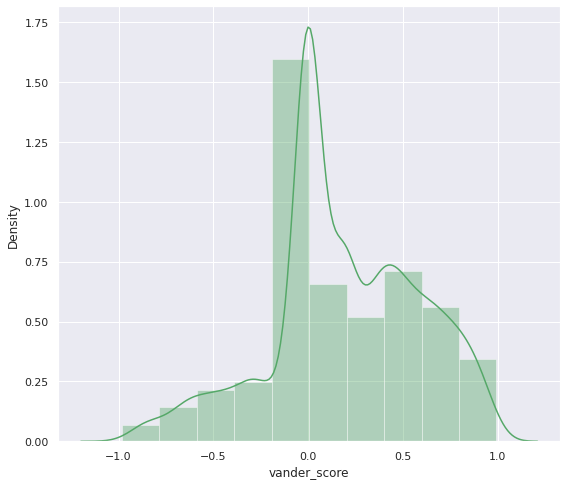



--------------


Sentiment score of Google Inc company


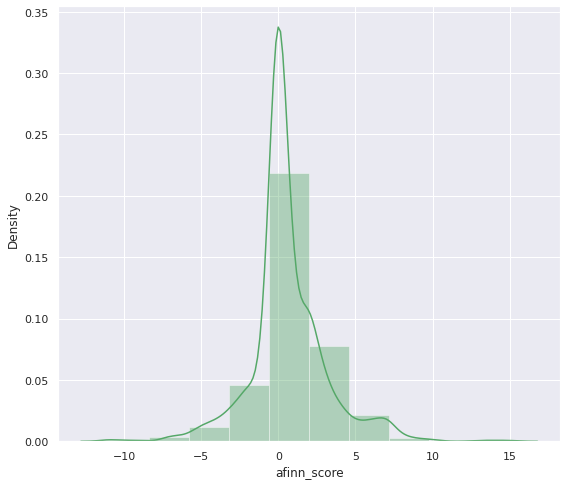

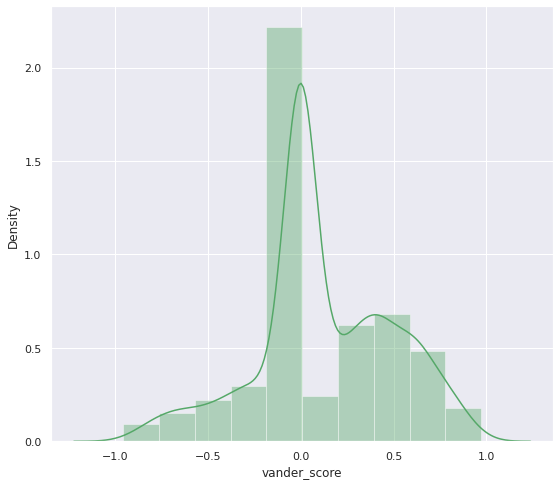



--------------


Sentiment score of Google Inc company


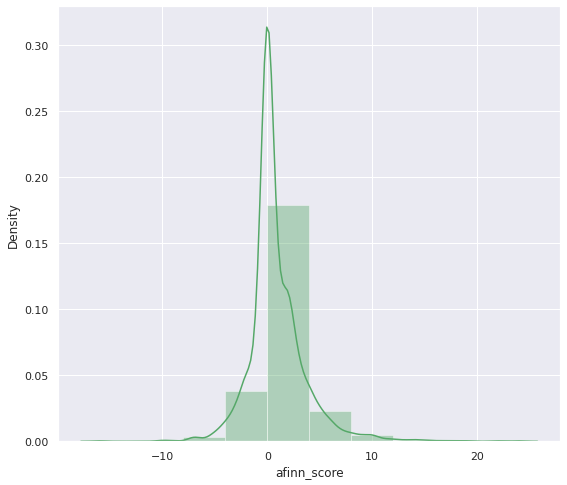

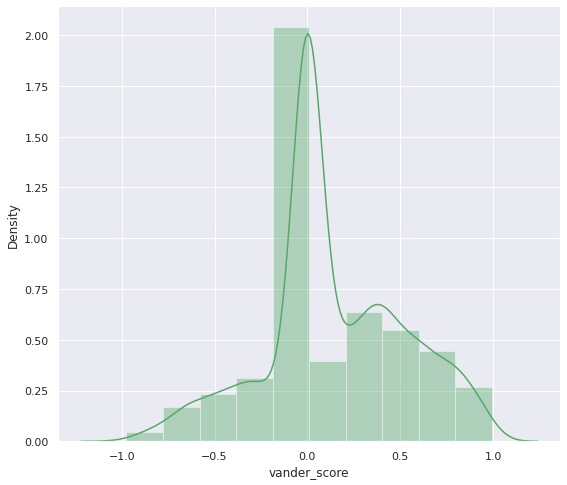



--------------


Sentiment score of Microsoft company


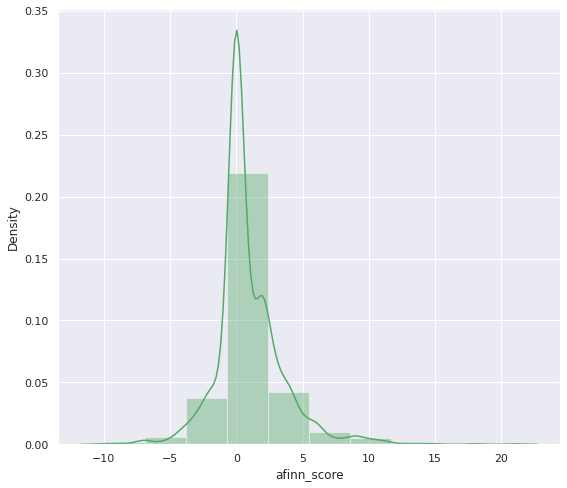

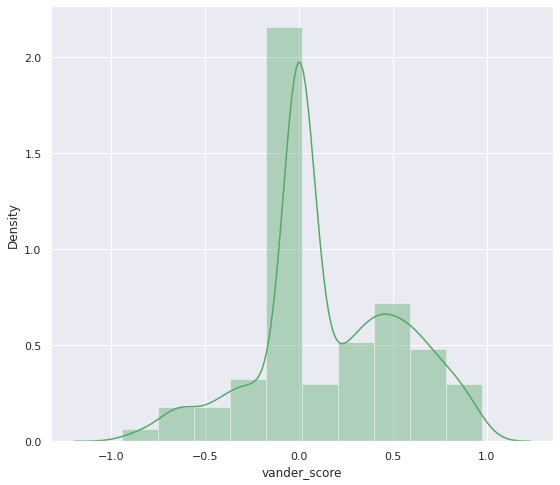



--------------


Sentiment score of Tesla Inc company


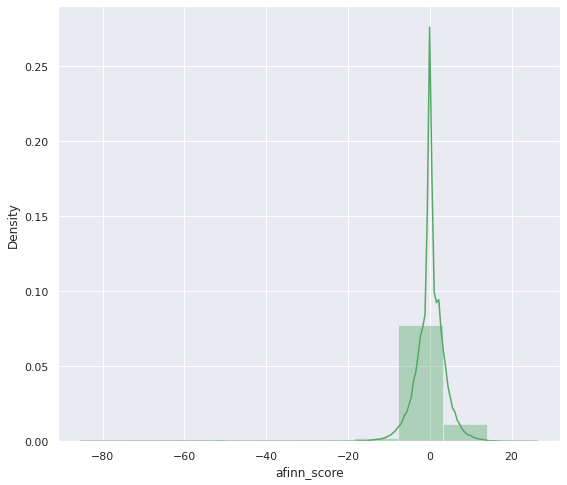

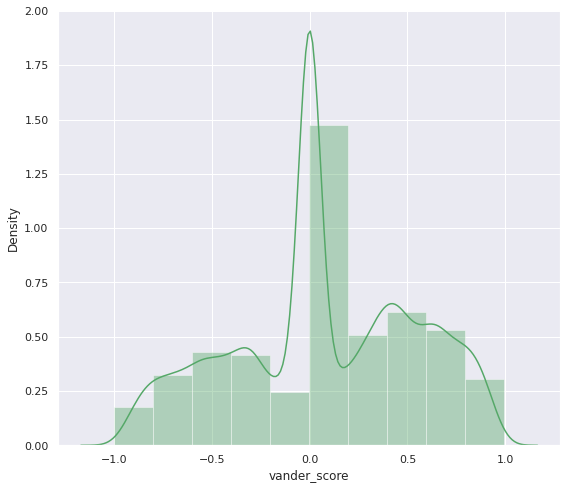



--------------




In [60]:
import time

for ticker_symbol in tweet_df["ticker_symbol"].unique():
    
    company_name = company[company["ticker_symbol"] == ticker_symbol]["company_name"].iloc[0]
    print(f"Sentiment score of {company_name} company")
    sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
    
    column_distplot(sub_tweet_df, column_name="afinn_score", bins=10, describe=False)
    column_distplot(sub_tweet_df, column_name="vander_score", bins=10, describe=False)
    plt.show()
    print("\n\n--------------\n\n")

In [61]:
def sentiment_overtime(tweet_df, stock_df, title, score_column_name="score"):
    print("\n\n")
    fig = plt.figure(figsize=(24,10))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    
#     ax1.plot(tweet_df['day_date'], tweet_df[score_column_name], label='Tweets Sentiment')
    ax1.vlines(tweet_df['day_date'], 0, tweet_df[score_column_name]) 
    ax1.axhline(y=0, color='r', linestyle='-')

    
    ax2.plot(stock_df['day_date'], stock_df['close_value'], color='orange', label='Stock price')
    ax2.set_title("Effects of " + title +" tweets to stock price")
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    ax1.set_xlabel('Day date')
    ax1.set_ylabel('Sentiment Afinn score', color="blue")
    
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    
#     center_y = max(stock_df['close_value']) - min(stock_df['close_value']) / 2
#     print(center_y)
    
    plt.show()

In [62]:
ticker_symbols =  tweet_df["ticker_symbol"].unique()

In [63]:
def draw_stock_price_with_sentiment(tweet_df, stock_df, start_day, end_day, score_name="score"):
    for ticker_symbol in ticker_symbols:
        print(f"Ticker symbol: {ticker_symbol}")

        sub_company = company[company["ticker_symbol"] == ticker_symbol]["company_name"]
        if len(sub_company) != 1:
            continue

        company_name = sub_company.iloc[0]
    #     print(company_name)

        print(f"Stock price of {company_name} company with ticker symbol is {ticker_symbol}")

        sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
        sub_tweet_df = sub_tweet_df[(sub_tweet_df["day_date"]>=pd.to_datetime(start_day)) & (sub_tweet_df["day_date"]<=pd.to_datetime(end_day))]
    #     print(sub_tweet_df[:5])
        sub_stock_df = stock_df[stock_df["ticker_symbol"] == ticker_symbol]
        sub_stock_df = sub_stock_df[(sub_stock_df["day_date"]>=pd.to_datetime(start_day)) & (sub_stock_df["day_date"]<=pd.to_datetime(end_day))]

    #     print(sub_stock_df[:5])
        sentiment_overtime(sub_tweet_df, sub_stock_df, company_name, score_column_name=score_name)

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





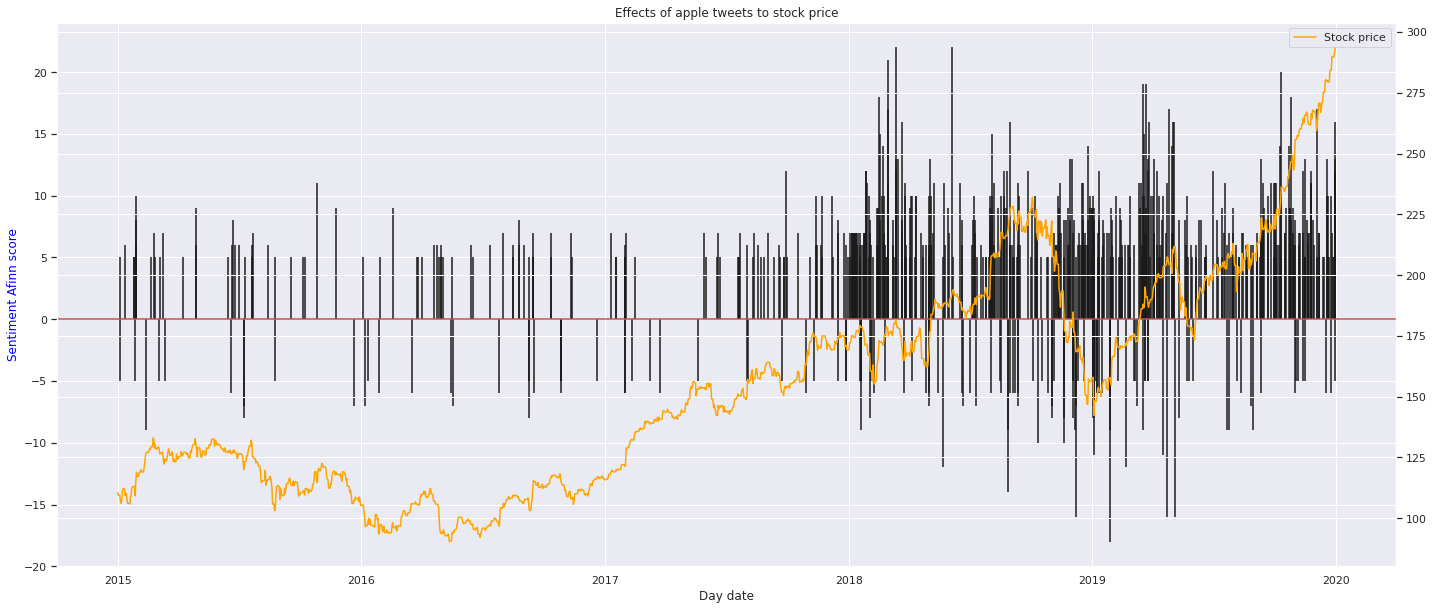

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





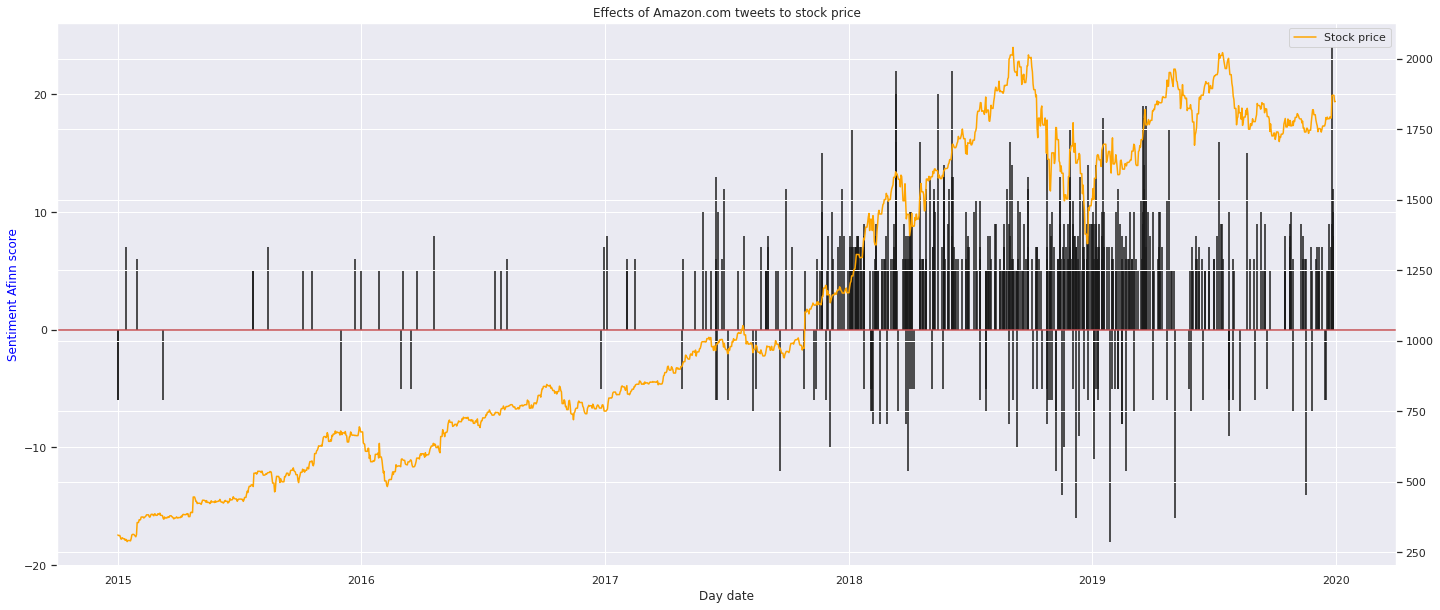

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





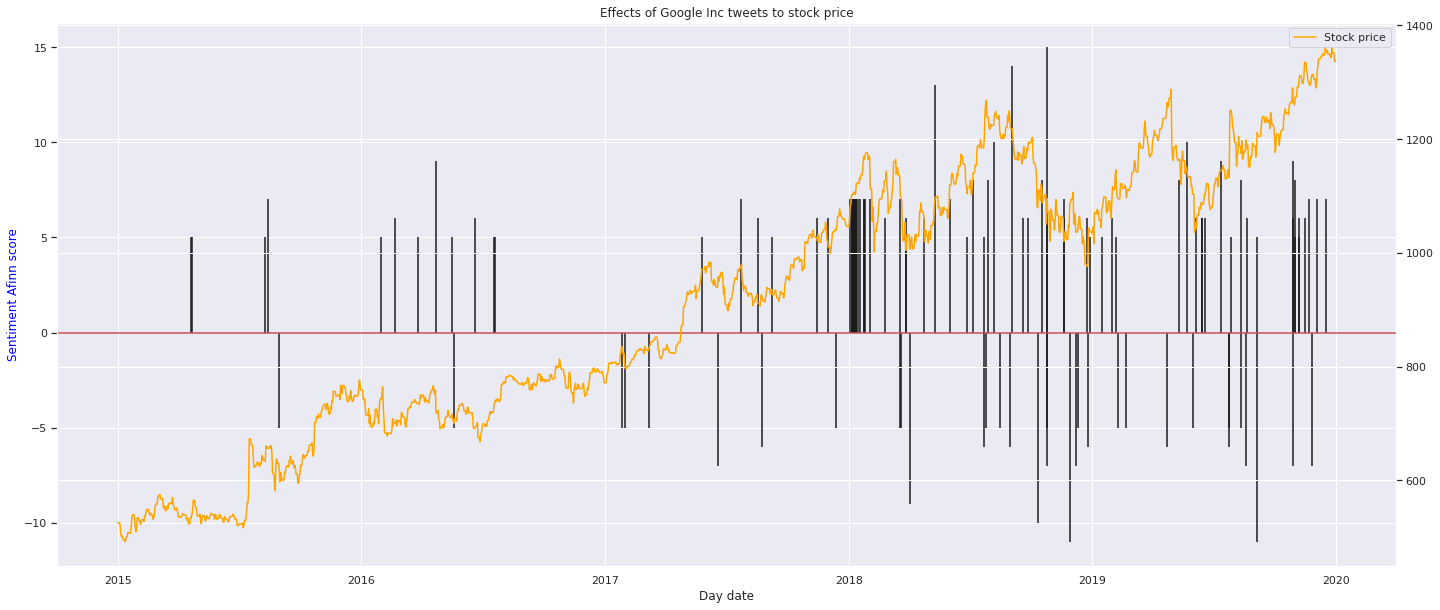

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





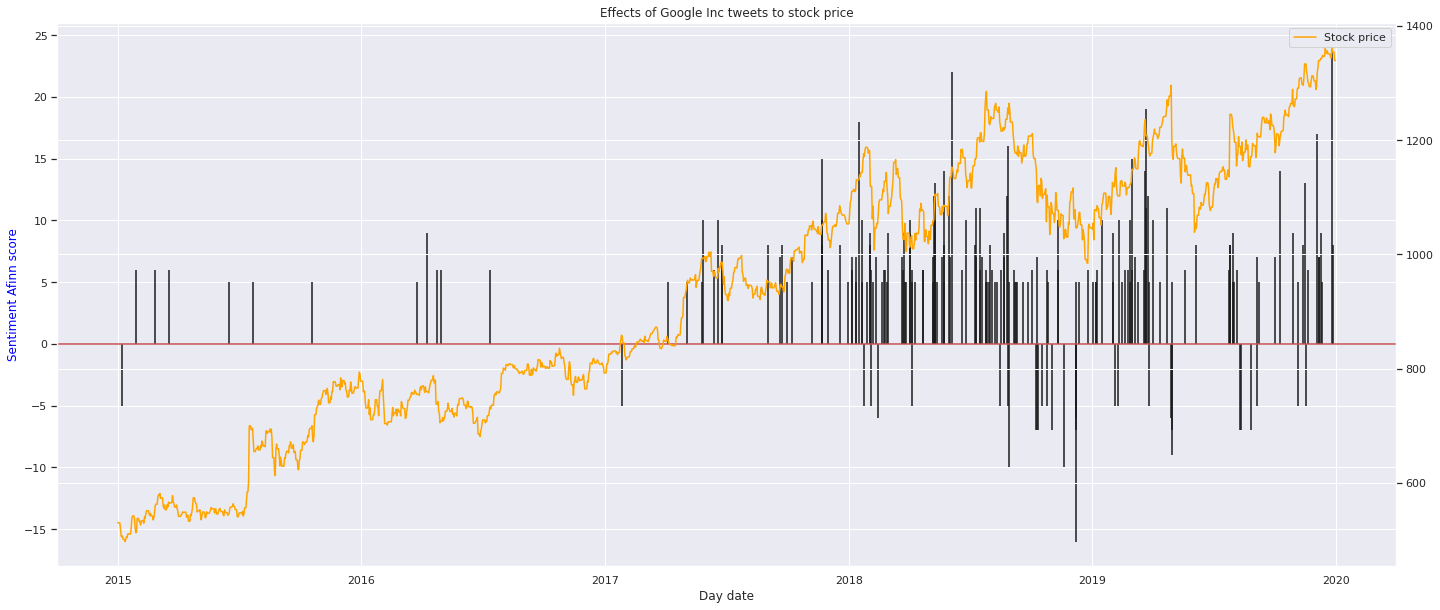

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





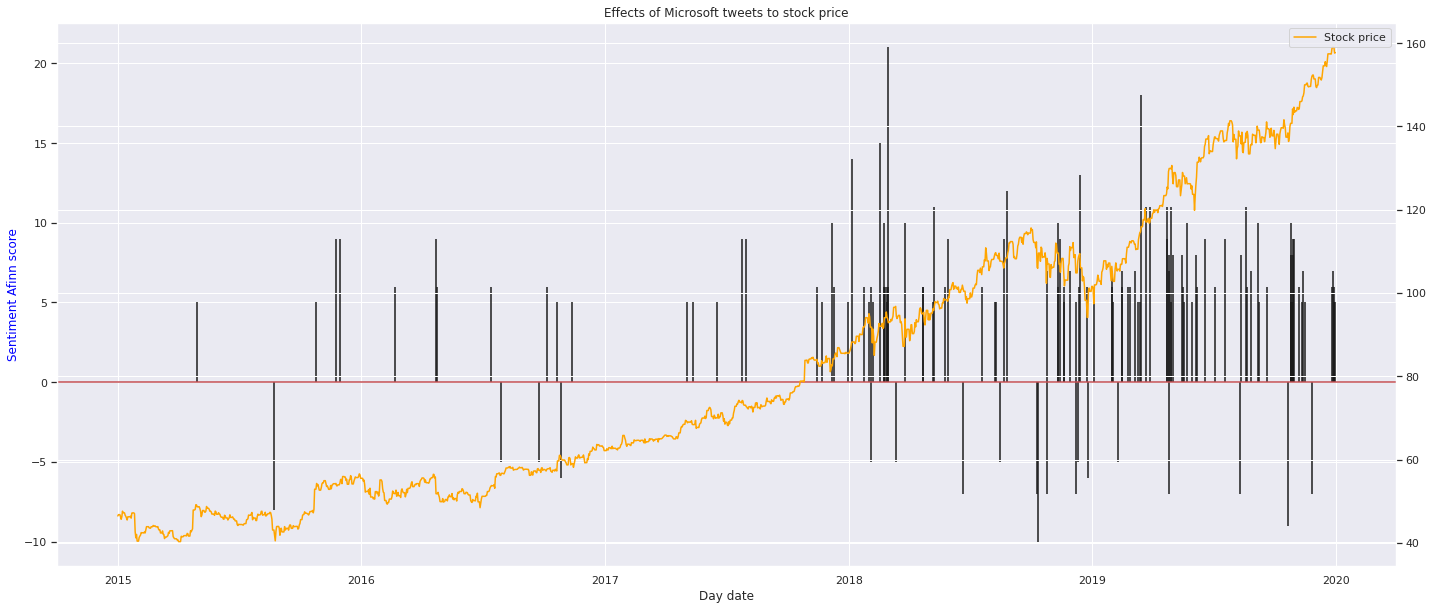

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





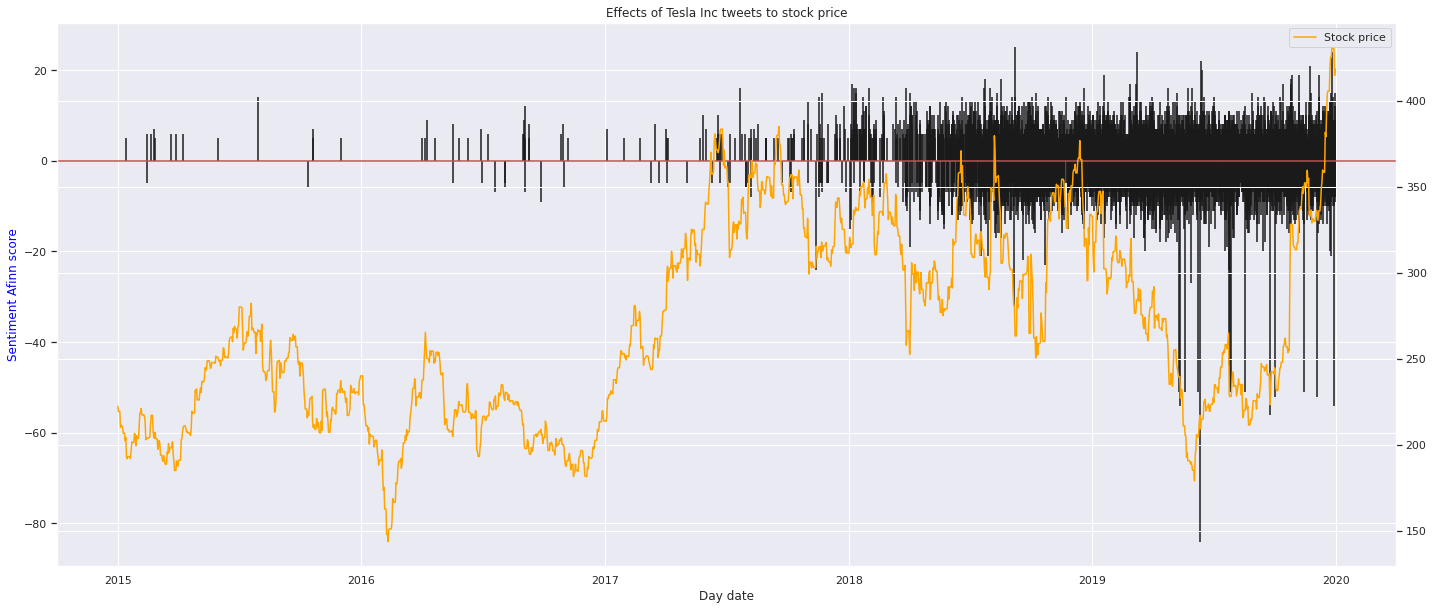

In [64]:
score_threshold = 5
tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]
# tmp_tweet_df = tweet_df

draw_stock_price_with_sentiment(tmp_tweet_df, stock_df,start_day= min(stock_df['day_date']), end_day= max(stock_df['day_date']), score_name="afinn_score")

In [65]:
start_day = "2019-6-1"
end_day = "2020-1-1"

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





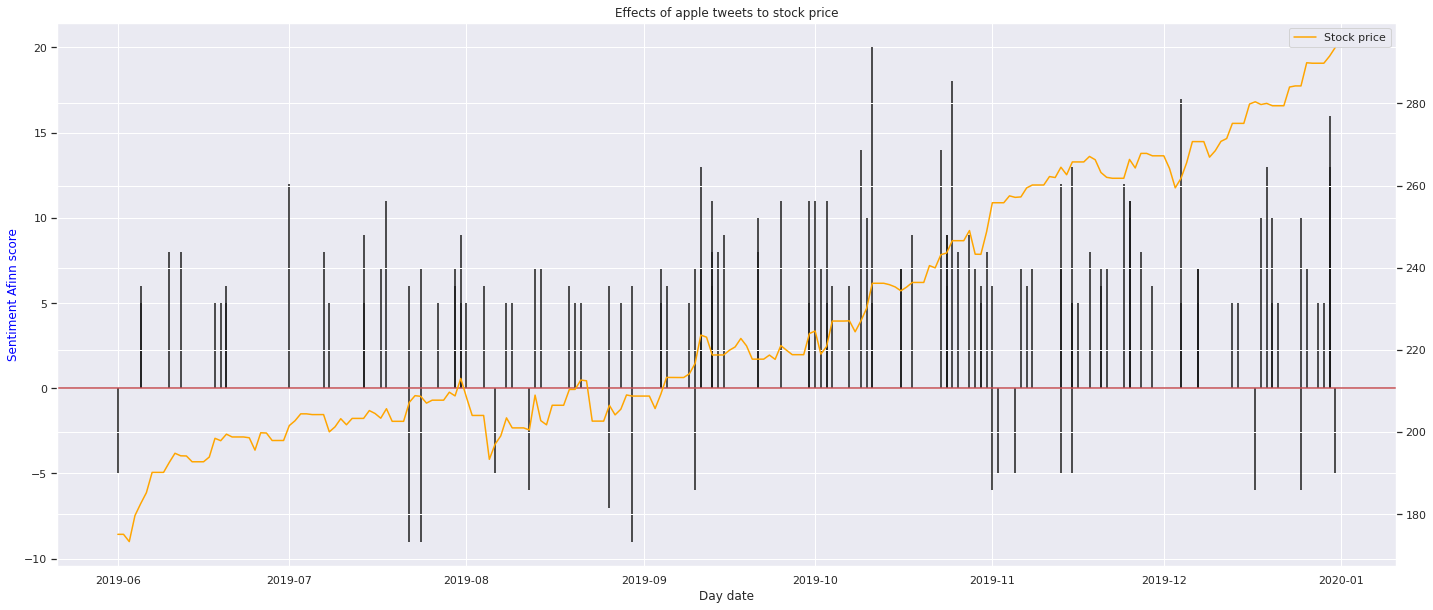

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





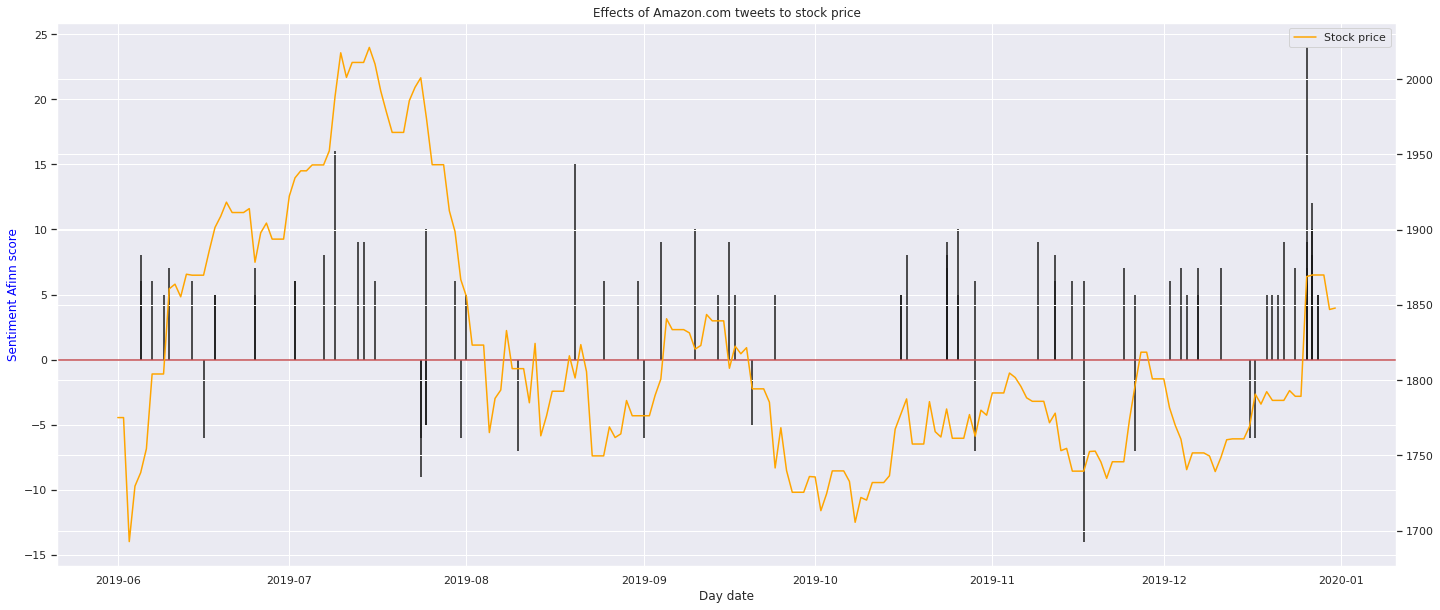

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





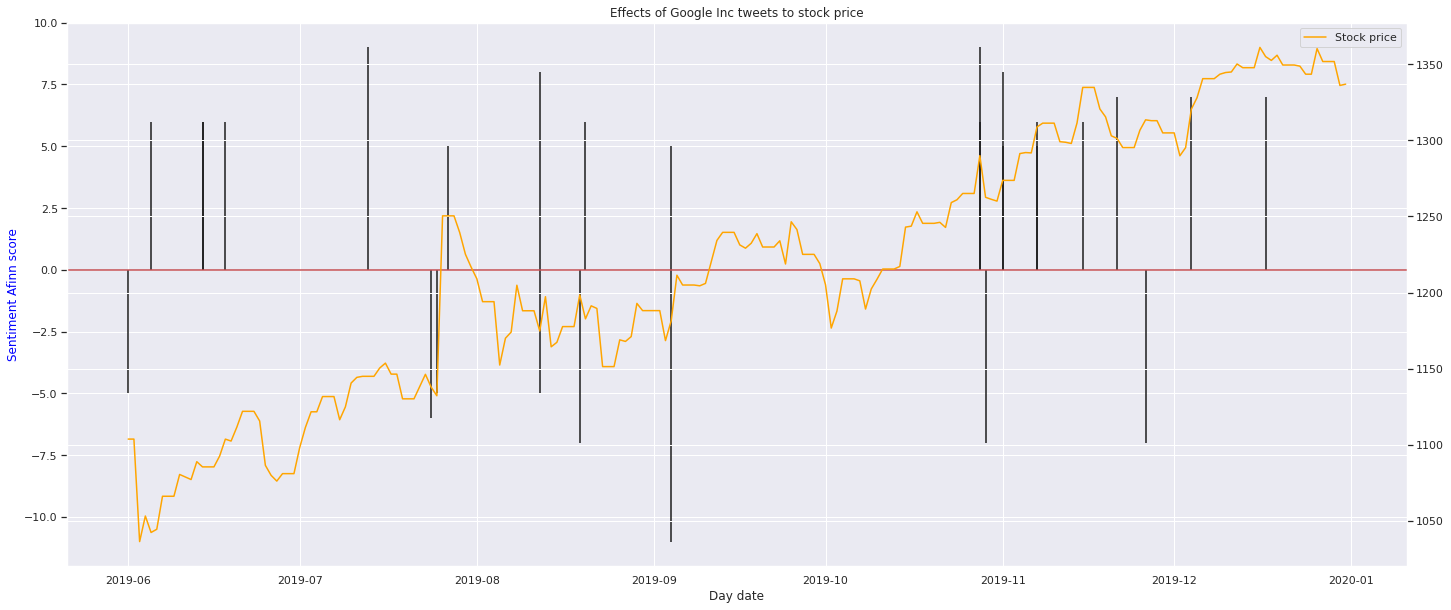

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





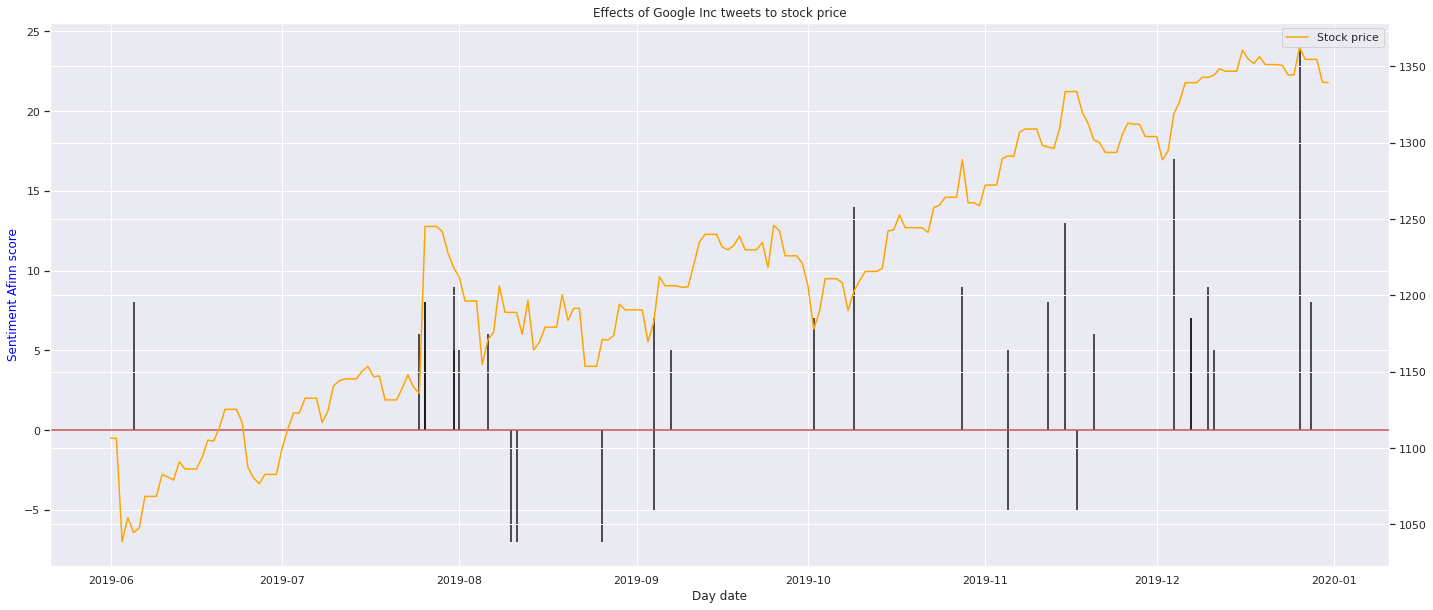

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





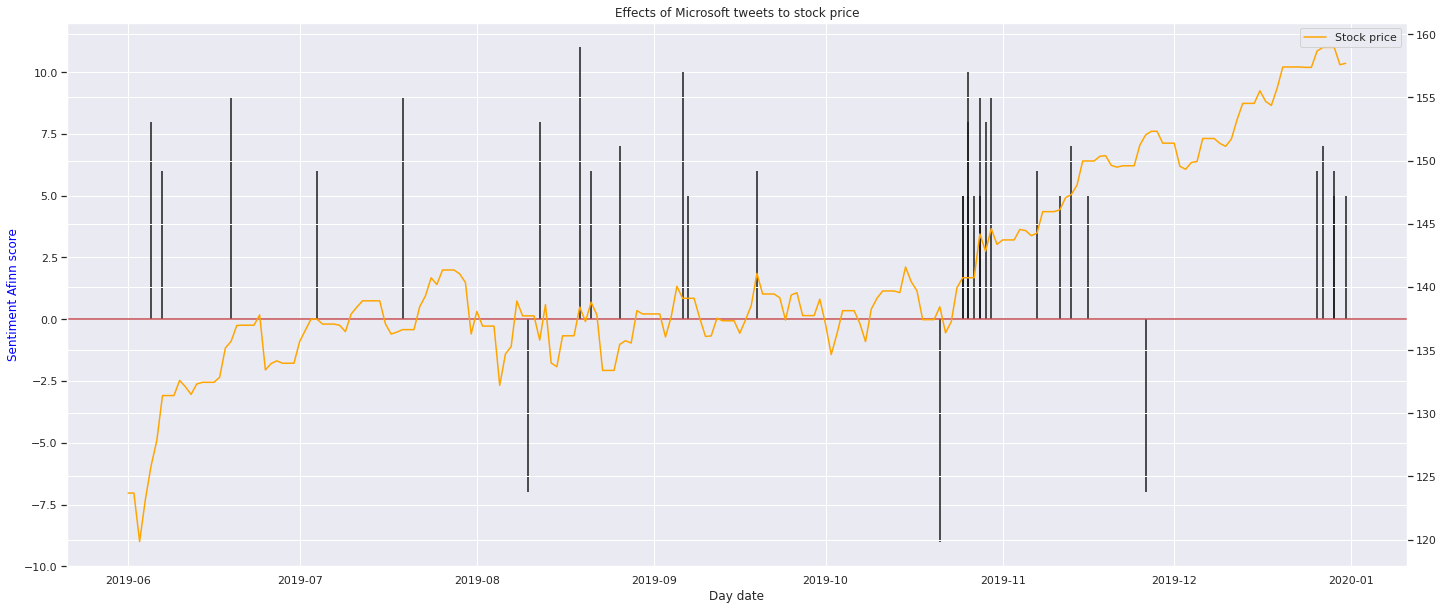

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





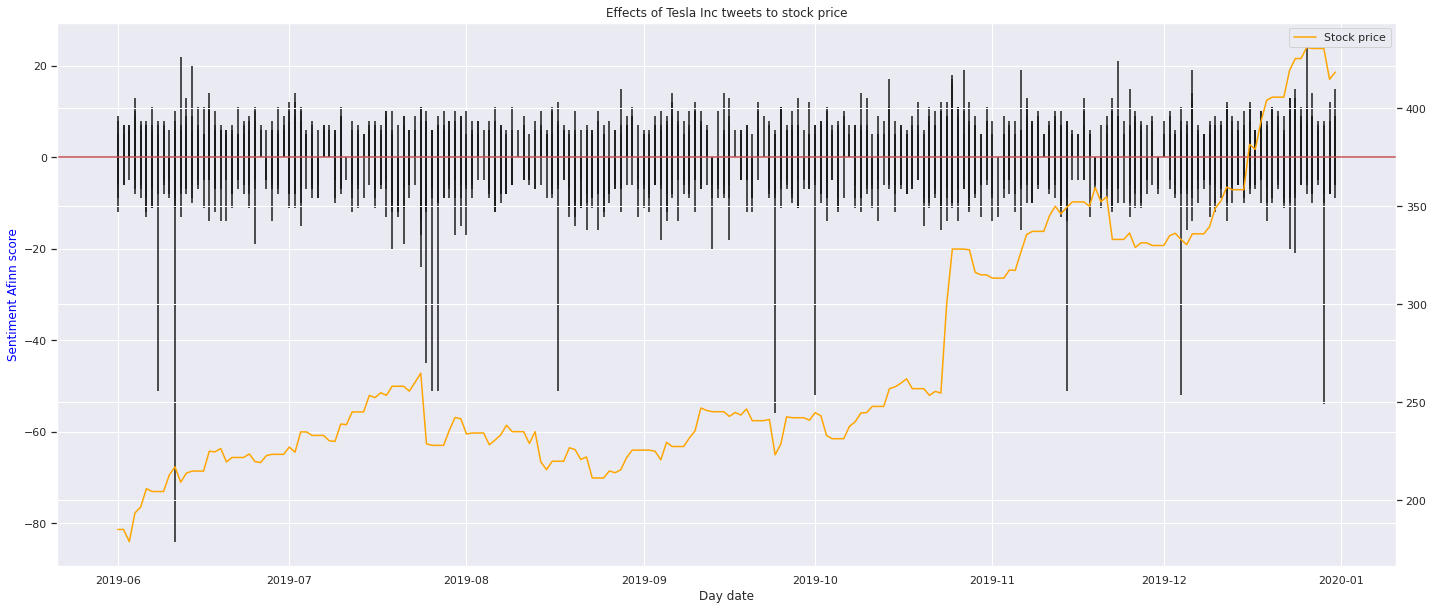

In [66]:
score_threshold = 5
tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]
draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_day,end_day, score_name="afinn_score")

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





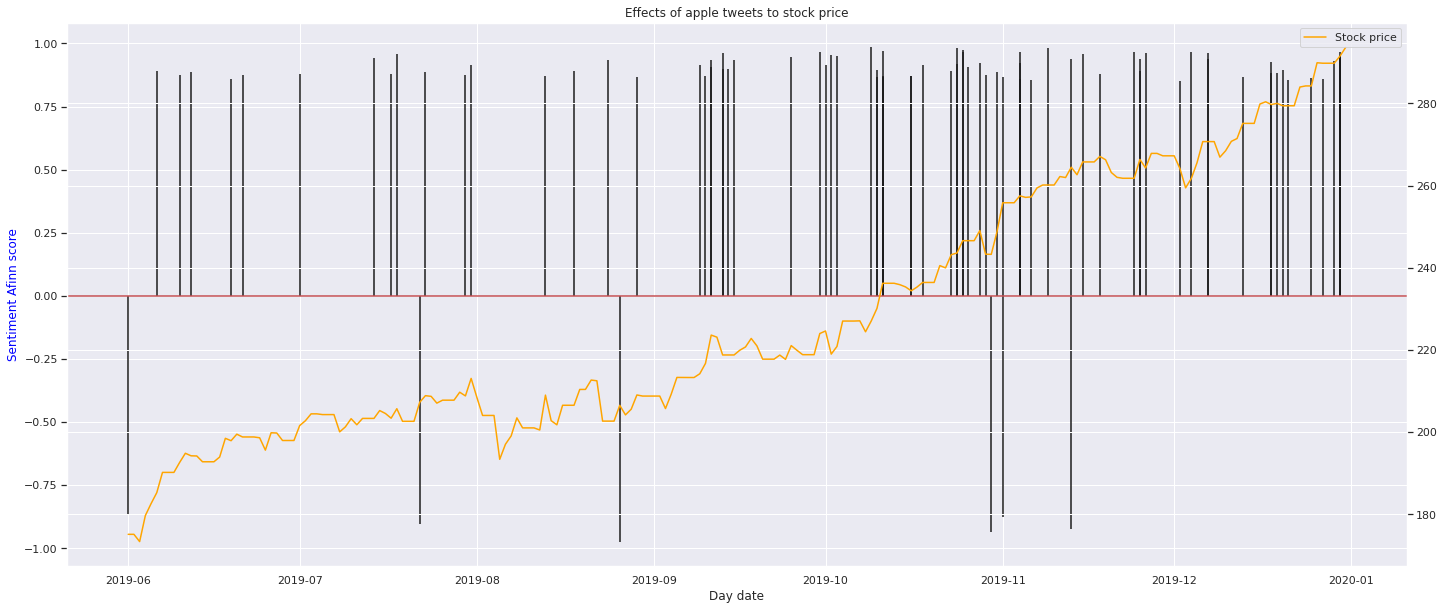

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





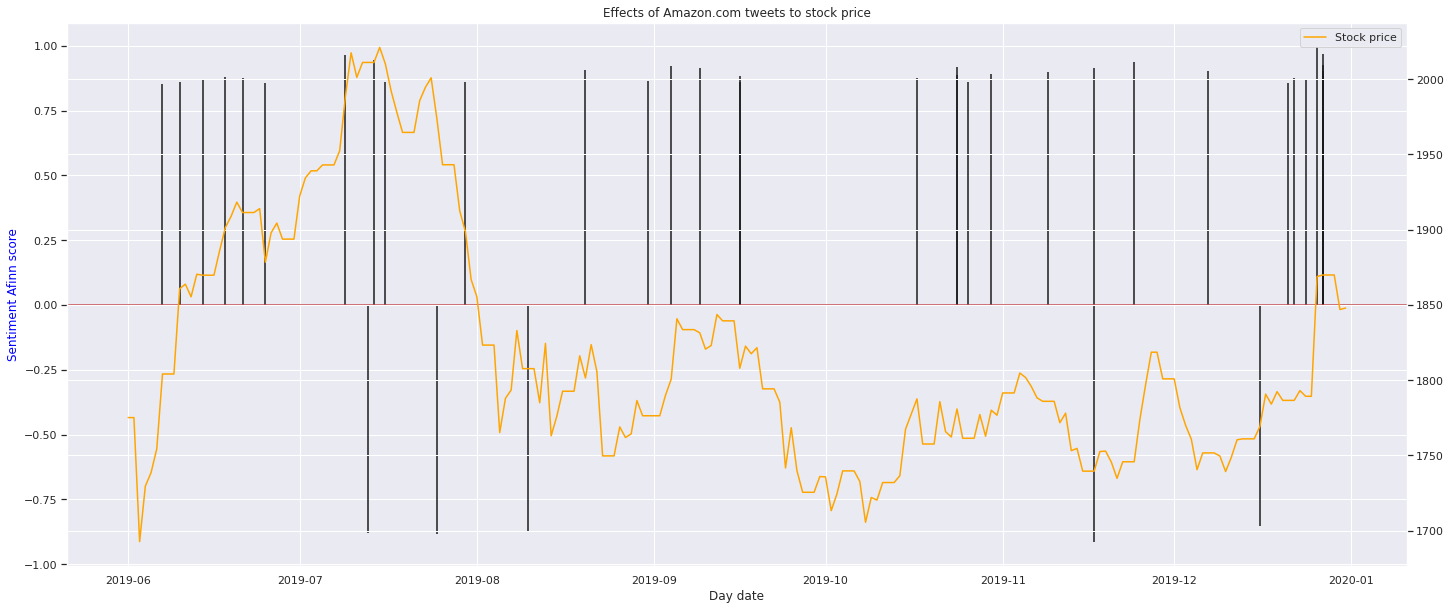

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





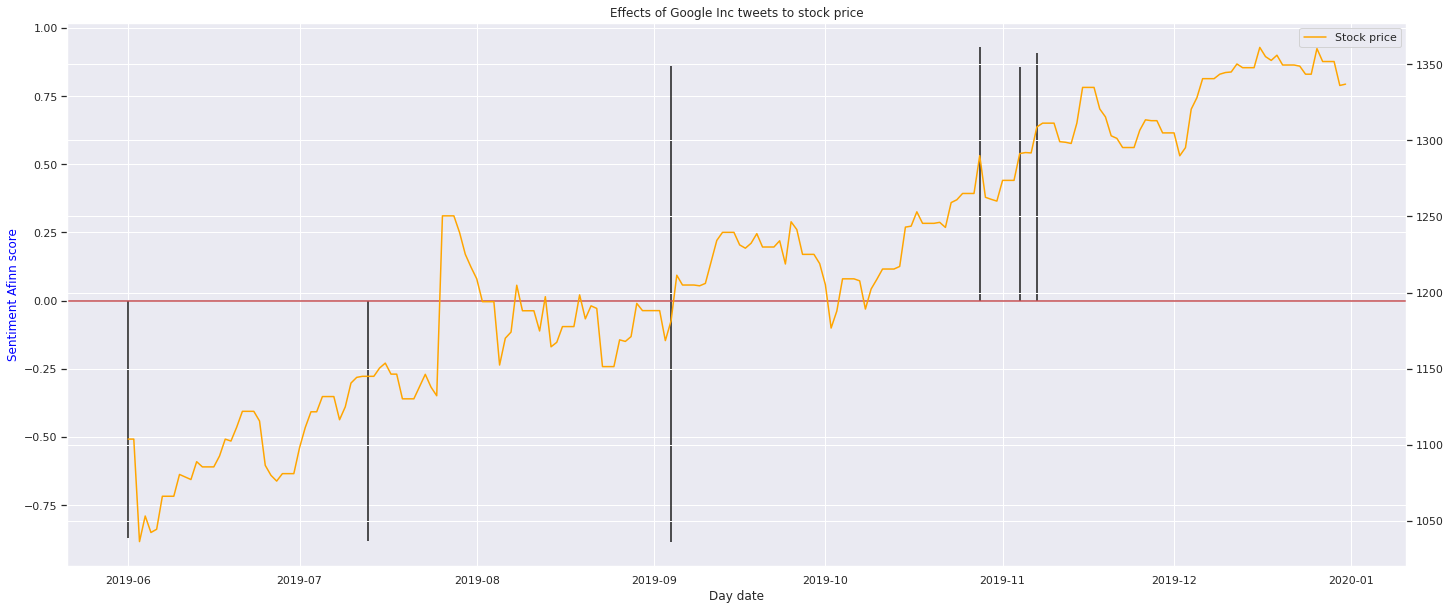

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





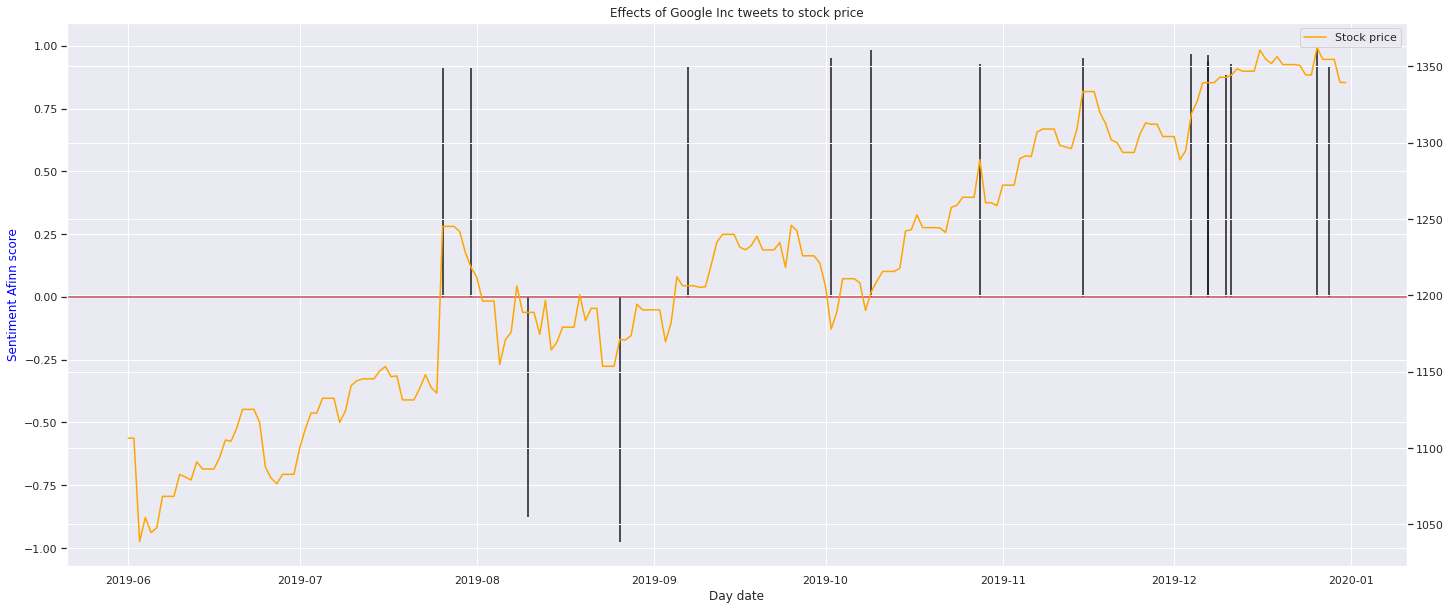

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





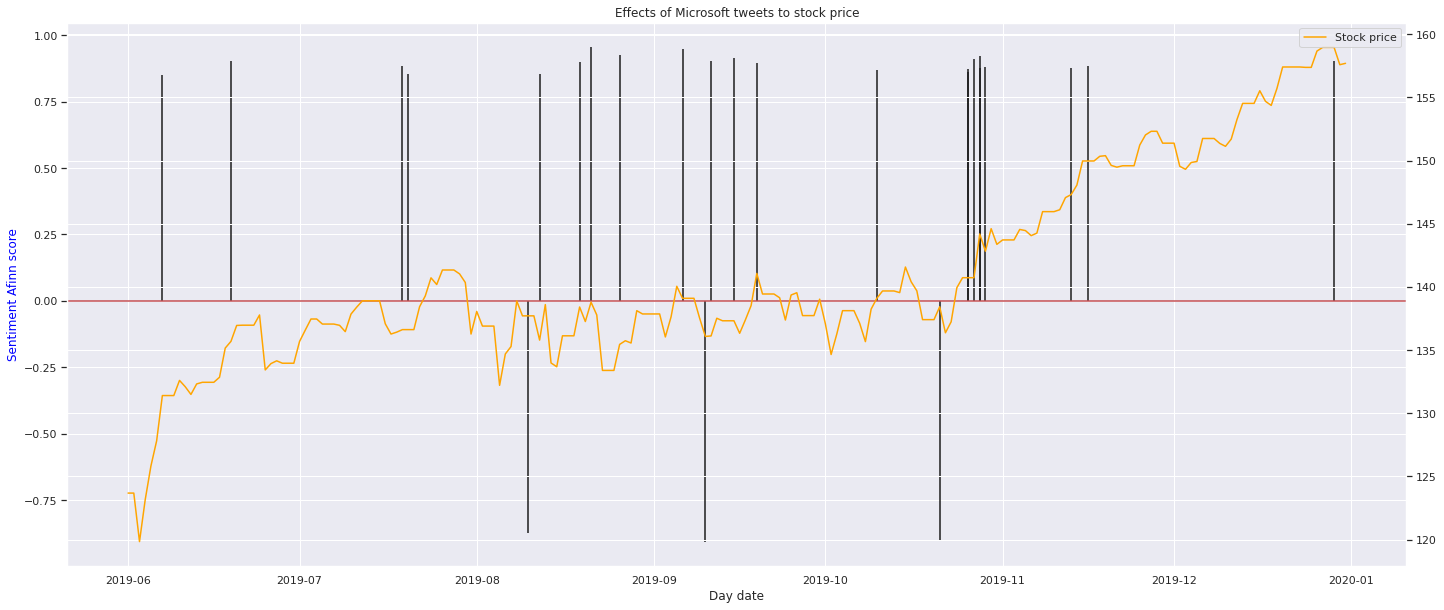

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





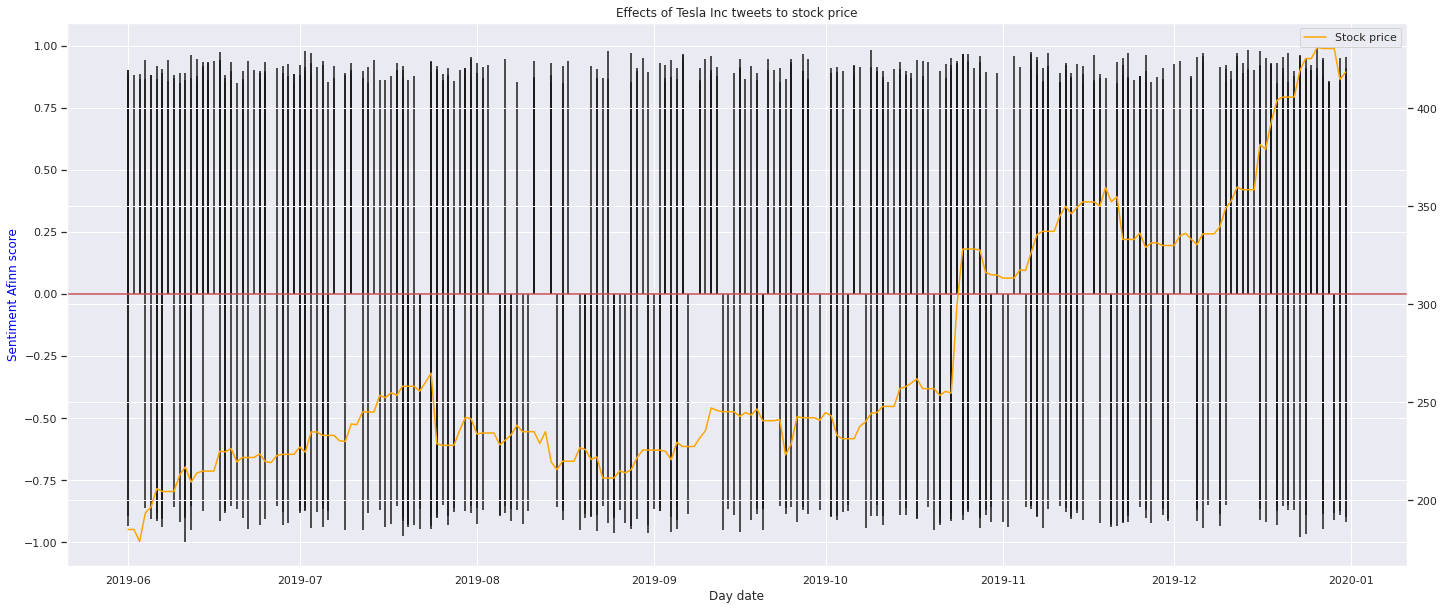

In [67]:
score_threshold = 0.85
tmp_tweet_df = tweet_df[(tweet_df['vander_score']<=-score_threshold) | (tweet_df['vander_score']>=score_threshold)]


draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_day, end_day, score_name="vander_score")